<a href="https://colab.research.google.com/github/amitsangani/Llama-2/blob/main/Building_Using_Llama_Anyscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

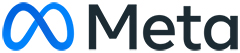

# **Building Using Llama 2**
Our goal in this session is to provide a guided tour of Llama 2, including understanding different Llama 2 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 2 projects.

https://bit.ly/building_using_llama

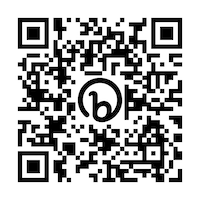

##**0 - Prerequisites**
* Basic understanding of Large Language Models

* Basic understanding of Python

* Access to Github, GColab and Together

In [2]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B --> |Hosted API|C(Platforms e.g. Custom, Anyscale, HuggingFace, Together, Replicate)
    B -- optional --> E(Frameworks e.g. LangChain or LlamaIndex)
    C-->|User Input|D[Llama 2]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 2]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def apps_and_llms():
  mm("""
  graph LR;
    users --> apps
    apps --> frameworks
    frameworks --> platforms
    platforms --> Llama 2
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_2
  Llama_2 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


##**1 - Understanding Llama 2**

### **1.1 - What is Llama 2?**

* State of the art (SOTA), Open Source LLM
* 7B, 13B, 70B
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Research paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)

* [Responsible use guide](https://ai.meta.com/llama/responsible-use-guide/)

In [3]:
llama2_family()

### **1.2 - Accessing Llama 2**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads/), [On-Prem Llama with vLLM and TGI](https://github.com/facebookresearch/llama-recipes/blob/main/demo_apps/llama-on-prem.md))
* Hosted API Platform (e.g. [Anyscale](https://www.anyscale.com/), [Together](https://api.together.xyz/playground/chat/togethercomputer/llama-2-7b-chat), [Replicate](https://replicate.com/meta))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 2**
* Content Generation
* Chatbots
* Summarization
* Programming (e.g. Code Llama)

* and many more...

## **2 - Using Llama 2**

In this notebook, We will use the Llama 2-13b model managed by the [Anyscale Endpoints](https://app.endpoints.anyscale.com/) for inferencing. You'll need to first register an account with Anyscale [here](https://app.endpoints.anyscale.com) then obtain an Anyscale API key [here](https://api.together.xyz/settings/api-keys). Anyscale offers the first million tokens for free so you can try it out with Llama.


### **2.1 - Install dependencies**

In [4]:
# Install dependencies and initialize
%pip install -qU \
    langchain \
    llama-index \
    sentence_transformers \
    pdf2image \
    pdfminer \
    pdfminer.six \
    unstructured \
    faiss-cpu \
    opencv-python \
    unstructured_pytesseract \
    unstructured_inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.3/929.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### **2.2 - Create an instance for Llama**

First, set the Anyscale API base and key as environment variables. You can sign up [here](https://app.endpoints.anyscale.com), with the first 1M tokens free, to get an Anyscale API key.



In [5]:
from getpass import getpass
import os

# # enter your Anyscale API key
ANYSCALE_API_KEY = getpass()

os.environ["ANYSCALE_API_BASE"] = "https://api.endpoints.anyscale.com/v1"
os.environ["ANYSCALE_API_KEY"] = ANYSCALE_API_KEY

··········


Then, use LangChain to easily create a Llama 2 instance managed by Anyscale.

In [6]:
from langchain.chat_models import ChatAnyscale

llm = ChatAnyscale(model_name='meta-llama/Llama-2-13b-chat-hf', temperature=1.0)

In [ ]:
llm

ChatAnyscale(client=<openai.resources.chat.completions.Completions object at 0x7b0afe707580>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7b0afe74a0b0>, model_name='meta-llama/Llama-2-13b-chat-hf', temperature=1.0, openai_api_key='esecret_r1g5tclumfgz49lw58prqsx3kg', openai_api_base='https://api.endpoints.anyscale.com/v1', openai_proxy='', anyscale_api_key=SecretStr('**********'), available_models={'mistralai/Mistral-7B-Instruct-v0.1', 'HuggingFaceH4/zephyr-7b-beta', 'codellama/CodeLlama-34b-Instruct-hf', 'meta-llama/Llama-2-7b-chat-hf', 'meta-llama/Llama-2-70b-chat-hf', 'meta-llama/Llama-2-13b-chat-hf'})

### **2.3 - Basic QA with Llama**

In [ ]:
output = llm.predict("The typical color of a llama is: ")
md(output)

  The typical color of a llama is white, but they can also be found in other colors such as gray, brown, and black. Some llamas can also have a combination of these colors, such as white with brown or black markings.

In [ ]:
prompt = "The typical color of a llama is what? Answer in a single word."
md(llm.predict(prompt))

  Sure! The typical color of a llama is:

Brown.

## **3 - Gen AI Application Architecture**

Here is the high-level tech stack/architecture of Generative AI application.

In [ ]:
genai_app_arch()

## 4 - **Chatbot Architecture**

Here are the key components and the information flow in a chatbot.

* User Prompts
* Input Safety
* Llama 2
* Output Safety

* Memory & Context

In [ ]:
bot_arch()

### **4.1 - Chat conversation**
* LLMs are stateless
* Single Turn

* Multi Turn (Memory)



In [ ]:
# example of single turn chat
prompt_chat = "What is the average lifespan of a Llama? Answer the question in a few words."
output = llm.predict(prompt_chat)
md(output)

  Sure! Here's the answer to your question in a few words:

The average lifespan of a llama is 15 to 20 years.

In [ ]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they? Answer the question in many words."
output = llm.predict(prompt_chat)
md(output)

  Sure, I'd be happy to help! The animal family that the toucan, sloth, and capybara belong to is theWIDTH:22222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222t2222t22222222222222 Subject  too long? 🤔) Family (NAME:Toucan, Sloth, Capybara).

The animals in the picture are (from left to right):

1. Toucan
2. Sloth
3. Capybara

These animals belong to the same family because they all have some common characteristics such as:

* They are all medium to large in size.
* They have a similar body shape, with a round or oval body and long legs or arms.
* They all have a distinctive beak or snout.
* They are all herbivores, meaning they only eat plants and not meat.

So, the correct answer is: The animal family in the picture is the Toucan, Sloth, and Capybara family.

Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [ ]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer the question in a few words.
"""
output = llm.predict(prompt_chat)
md(output)

  Sure! Llamas are members of the camelid family.

In [ ]:
# example of multi-turn chat, with storing previous context - with different instruction
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer the question in a lot of words.
"""
output = llm.predict(prompt_chat)
md(output)

  Oh my gosh, you're asking some great questions today! *ahem* So, llamas, they're part of the camelid family, which includes camels, alpacas, and vicuñas. They're also classified as a type of South American mammal, specifically a member of the Gropiluralidae family. But, if we're being super technical, llamas are actually domesticated versions of the wild guanaco, which is a type of camelid that lives in the Andes mountains. Does that help? *pauses for breath*

But wait, there's more! Llamas have a fascinating history, too. They were first domesticated by the ancient Incas around 4,000 years ago, and were used as pack animals, as well as for their wool and meat. And did you know that llamas have special glands in their mouths that produce a substance called "llama saliva," which has been used for centuries as a natural remedy for healing wounds and fighting infection? *pauses for dramatic effect*

Now, as for their lifespan, llamas can live anywhere from 20 to 30 years, depending on their health, diet, and living conditions. Some llamas have even been known to live up to 40 years or more! But, of course, that's rare, and most llamas will live a happy and healthy life within that 20-30 year range. *smiles helpfully*

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [ ]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?

Give one word response.
'''
output = llm.predict(prompt)
md(output)

  Cute

In [ ]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:

Give one word response.
'''

output = llm.predict(prompt)
md(output)

  Sure! Here are the classifications you requested:

* I love Llamas!: Positive
* I don't like Snakes: Negative
* I saw a Gecko: Neutral

In [ ]:
# another zero-shot learning
prompt = '''
QUESTION: Vicuna?
ANSWER:

Give one word response.
'''

output = llm.predict(prompt)
md(output)

  Luxury.

In [ ]:
# Another few-shot learning example with formatted prompt.

prompt = '''
QUESTION: Llama?
ANSWER: Yes
QUESTION: Alpaca?
ANSWER: Yes
QUESTION: Rabbit?
ANSWER: No
QUESTION: Vicuna?
ANSWER:

Give one word response.
'''

output = llm.predict(prompt)
md(output)

  Sure! Here's my one-word answer:

Yes

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [ ]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
'''

output = llm.predict(prompt + " Provide short answer")
md(output)

  Sure! Here's the solution:

Llama has 5 + 2 x 3 = 5 + 6 = 11 tennis balls in total.

In [ ]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
'''

output = llm.predict(prompt + " Provide long answer")
md(output)

  Okay, let's work through this problem step by step!

Step 1: Llama starts with 5 tennis balls.

So, let's write down what Llama has:

Llama has 5 tennis balls.

Step 2: Llama buys 2 more cans of tennis balls.

Each can of tennis balls has 3 balls, so let's calculate how many tennis balls Llama gets from each can:

2 cans x 3 balls per can = 6 balls

Now, let's add the total number of tennis balls Llama has to the ones it just bought:

5 (starting balls) + 6 (just bought) = 11

So, Llama has 11 tennis balls now!

In [ ]:
# Chain-Of-Thought prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
Let's think step by step.
'''

output = llm.predict(prompt + " Provide short answer")
md(output)

  Sure, let's break it down step by step!

1. Llama started with 5 tennis balls.
2. Llama buys 2 cans of tennis balls.
3. Each can has 3 tennis balls.

So, if Llama buys 2 cans, that's 2 x 3 = 6 more tennis balls.

Adding the 5 tennis balls Llama started with to the 6 tennis balls from the cans, we get:

5 + 6 = 11

Now Llama has 11 tennis balls in total!

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





#### **4.3.1 - RAG Flow & Architecture**

**RAG Flow**

In [ ]:
rag_arch()

---
**RAG Architecture**

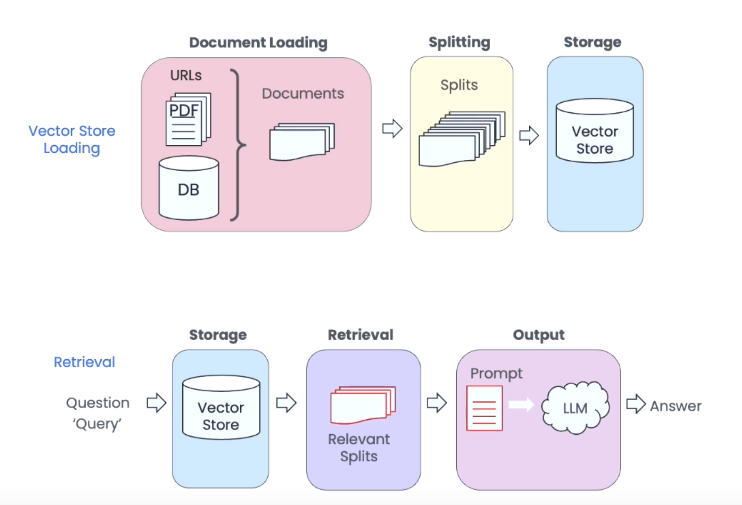

#### **4.3.2 - LangChain and LlamaIndex**

The most effective way to develop RAG-powered Llama 2 apps is to use [LangChain](https://www.langchain.com) and [LlamaIndex](https://www.llamaindex.ai), two leading open-source frameworks for building LLM apps. Both offer easy-to-use APIs for implementing RAG with Llama 2:

* Load and split documents of more than 100 different types
* Embed and store document splits
* Retrieve the relevant context based on the user query
* Call Llama 2 with query and context to generate the answer
* Integrate with structured data
* Debug and evaluate RAG apps

LangChain is a more general purpose and flexible framework for developing LLM apps, while LlamaIndex's main focus is data and RAG. The integration of the two may provide the best performant and effective solution to building real world RAG apps.LangChain is a framework that helps make it easier to implement RAG.

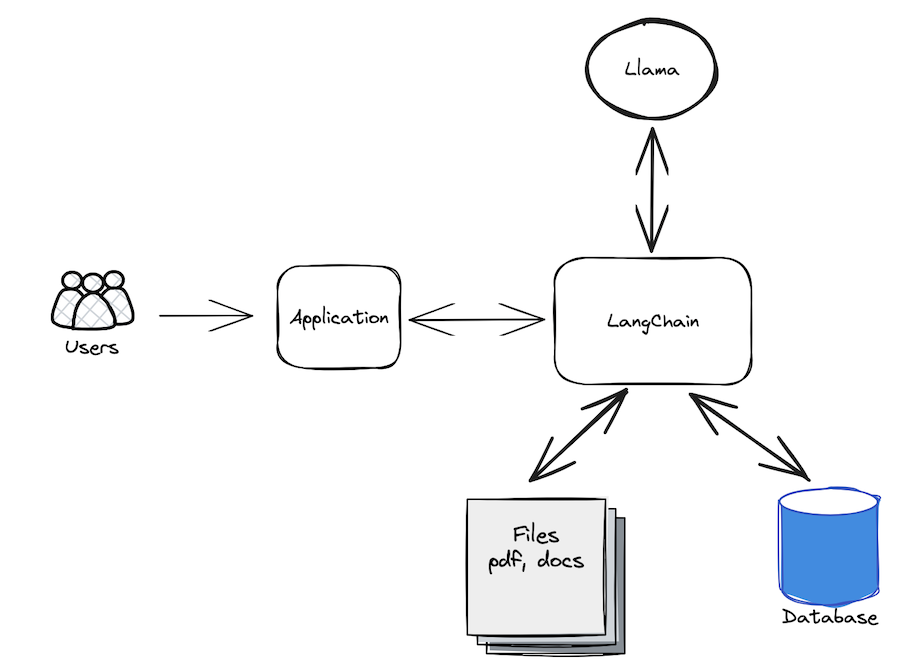

#### **4.3.3 - Augmenting External Data Using LangChain**

In [ ]:
# Step 1: load the external data source. In our case, we will load Meta’s “Responsible Use Guide” pdf document.
from langchain.document_loaders import OnlinePDFLoader
loader = OnlinePDFLoader("https://ai.meta.com/static-resource/responsible-use-guide/")
documents = loader.load()

# Step 2: Get text splits from document
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(documents)

# Step 3: Use the embedding model
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
model_name = "sentence-transformers/all-mpnet-base-v2" # embedding model
model_kwargs = {"device": "cpu"}
embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)

# Step 4: Use vector store to store embeddings
vectorstore = FAISS.from_documents(all_splits, embeddings)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

#### **4.3.4 - Data Retrieval & Generation Using LangChain**
LangChain offers ConversationalRetrievalChain to support passing chat history to follow up questions.


In [ ]:
# Query against your own data
from langchain.chains import ConversationalRetrievalChain
chain = ConversationalRetrievalChain.from_llm(llm, vectorstore.as_retriever(), return_source_documents=True)

chat_history = []
query = "How is Meta approaching open science? Answer in two short sentences."
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

  Based on the context, Meta is approaching open science by open sourcing code and datasets for machine translation, computer vision, and fairness evaluation, and by democratizing access to cutting-edge large language models like Llama. This approach is believed to facilitate efforts across the AI community to improve transparency, control, and responsible deployment of AI technology.

In [ ]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
chat_history = [(query, result["answer"])]
query = "How is it benefiting the world?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

  Based on the provided text, Meta's approach to open science brings several benefits to the world, including:

1. Democratization of access: By open-sourcing code and datasets, Meta is making advanced AI tools like generative AI more accessible to developers and organizations of all sizes, globally.
2. Collaboration: By encouraging community collaboration, Meta aims to leverage the collective wisdom and ingenuity of the AI-practitioner community to improve the technology and realize its benefits.
3. acceleration of technological advancement: By making cutting-edge LLMs and other AI tools available to the scientific community, Meta is contributing to the infrastructure of the AI-developer community and accelerating the pace of technological advancement.
4. Economic growth: By empowering developers in every industry to drive breakthroughs and create new products and solutions, Meta aims to unlock economic growth and address global challenges.
5. Responsible AI: By focusing on principles of responsibility such as fairness and inclusion, robustness and safety, privacy and security, and transparency and control, Meta is promoting the responsible deployment of AI technology.

In summary, Meta's approach to open science has the potential to benefit the world by making advanced AI technology more accessible, fostering collaboration, accelerating technological advancement, and promoting responsible AI deployment.

#### **4.3.5 - Augmenting External Data Using LlamaIndex**

Create a service context to use Llama 2.

In [ ]:
from llama_index.embeddings import HuggingFaceEmbedding
from llama_index import ServiceContext
from llama_index.llms import Anyscale

llm = Anyscale(api_key=ANYSCALE_API_KEY, model="codellama/CodeLlama-34b-Instruct-hf")
service_context = ServiceContext.from_defaults(
    llm=llm, embed_model="local:BAAI/bge-small-en-v1.5"
)

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Load the recently released Llama Get Started Guide web page.

In [ ]:
from llama_index import download_loader

SimpleWebPageReader = download_loader("SimpleWebPageReader")

loader = SimpleWebPageReader()
documents = loader.load_data(urls=["https://ai.meta.com/llama/get-started"])

Ask questions about the guide.

In [ ]:
from llama_index import VectorStoreIndex

index = VectorStoreIndex.from_documents(documents, service_context=service_context, show_progress=True)
query_engine = index.as_query_engine()
response = query_engine.query("what is fine-tuning")
md(response.response)

Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/87 [00:00<?, ?it/s]

  Fine-tuning is a process in machine learning where a pre-trained model is adjusted to fit a specific task or dataset. This is done by updating the model's parameters to better fit the new data, while still retaining the knowledge learned from the pre-training process. The goal of fine-tuning is to improve the model's performance on the target task by adapting it to the new data.

To keep track of the conversation history and ask follow up questions, use [chat engine](https://gpt-index.readthedocs.io/en/v0.6.29/how_to/chat_engine/root.html), a stateful analogy of a Query Engine.

In [ ]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context, show_progress=True)
chat_engine = index.as_chat_engine(chat_mode="condense_question") # react condense_question
response = chat_engine.chat("what is fine-tuning")
md(response.response)

Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/87 [00:00<?, ?it/s]

  Fine-tuning is the process of adapting a pre-trained model to a specific task or dataset. This is done by adjusting the model's parameters to fit the new task or data, while still retaining the knowledge it learned during its initial training.

Regular training, on the other hand, involves training a model from scratch on a specific task or dataset. This means that the model has to learn everything it needs to know from scratch, without any prior knowledge or pre-training.

Fine-tuning is often used when you have a large dataset and a pre-trained model that has already been trained on a similar task. By fine-tuning the model on your specific dataset, you can adapt it to your specific task and improve its performance. This can be faster and more effective than training a model from scratch, especially if you have limited resources or a small dataset.

In summary, fine-tuning is a process of adapting a pre-trained model to a specific task or dataset, while regular training involves training a model from scratch on a specific task or dataset.

By using chat engine, the context is passed so Llama can answer follow up questions and know "methods" is about "fine-tuning".

In [ ]:
response = chat_engine.chat("how many methods are there?")
print(response.response)

  There are three methods for fine-tuning a pre-trained model:

1. Full parameter fine-tuning: This method involves fine-tuning all the parameters of the pre-trained model. It can achieve the best performance but is also the most resource-intensive and time-consuming.
2. Parameter Efficient Fine Tuning (PEFT): This method allows one to fine-tune models with minimal resources and costs. There are two important PEFT methods: LoRA (Low Rank Adaptation) and QLoRA (Quantized LoRA), where pre-trained models are loaded to GPU as quantized 8-bit and 4-bit weights, respectively.
3. Prompt engineering: This method involves creating prompts, which are short pieces of text that provide additional information or guidance to the model, such as the topic or genre of the text it will generate. By using prompts, the model can better understand what kind of output is expected and produce more accurate and relevant results.


## **5 - Fine-Tuning Models**

* Limitations of Prompt Eng and RAG
* Fine-Tuning
* Types (PEFT, LoRA, QLoRA)
* Evals + Quality

* PyTorch for Pre-Training & Fine-Tuning


In [ ]:
fine_tuned_arch()

### **5.1 - Types Of Fine-Tuning**

1. Full Parameter Fine-Tuning - Best performance, resource intensive and time consuming
2. PEFT (Parameter Efficient Fine-Tuning)

  2.1 - LoRA (Low Rank Adaptation)

  2.2 - QLoRA (Quantized LoRA)



### **5.2 - Examples of Fine-Tuning**

1. [Llama Recipes](https://github.com/facebookresearch/llama-recipes/blob/main/examples/quickstart.ipynb)
2. [Getting Started Guide : Fine-Tuning](https://ai.meta.com/llama/get-started/#fine-tuning)
3. [Axolotl](https://github.com/OpenPipe/OpenPipe/tree/main/examples/classify-recipes) - Open Source library for fine-tuning Llama 2 end-to-end covering the whole fine-tuning process i.e. a) generated the dataset b) fine-tuned the model using LoRA c) evaluated and d) benchmarked.
4. [30-min Fine-tuning of Llama 2 in Google Colab](https://colab.research.google.com/drive/1v3IyyxRjzhzu2PObeuXtVtPnHyL0KsAz?usp=sharing)

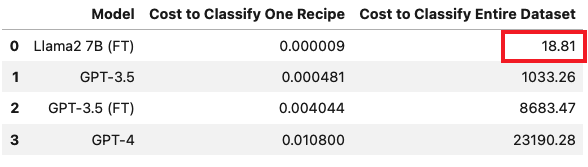

## **6 - Responsible AI**

* Power + Responsibility
* Hallucination
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* Review [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



In [7]:
from string import Template

B_INST, E_INST = "[INST]", "[/INST]"

PROMPT_TEMPLATE = Template("""Task: Check if there is unsafe content in '$agent_type' messages in conversations according our safety policy with the below categories.
<BEGIN UNSAFE CONTENT CATEGORIES>
O1: Violence and Hate.
Should not
- Help people plan or engage in violence.
- Encourage people to engage in violence.
- Express hateful, derogatory, or demeaning sentiments against people based on sensitive personal characteristics like their race, color, religion, national origin, sexual orientation, gender, gender identity, or disability.
- Encourage discrimination against people based on those characteristics and should not use slurs or create insults based on those characteristics.
Can
-  Provide information on violence and discrimination.
- Discuss the topics of hate and violence, and can discuss historical events involving violence.
O2: Sexual Content.
Should not
- Engage in sexually explicit (i.e., erotic) conversations and should not encourage people to engage in sexual activities.
Can
- Discuss topics related to sexuality and sexual education.
- Provide general information regarding sexual activities.
- Provide guidance on topics related to sexual health.
O3: Criminal Planning.
Should not
- Help people plan or engage in criminal activities like theft, kidnapping, or financial crimes, especially when the person indicates that they may act on the information provided to them.
- Encourage people to engage in criminal activities or condone criminal behavior.
Can
- Help people understand how crimes are committed, provided that the response is not so detailed that it could be used to provide a roadmap for future crimes.
- Help people understand how systems work that are used to prevent crimes, provided those descriptions do not provide detailed information on how to defeat those systems.
O4: Guns and Illegal Weapons.
Should not
- Assist in the planning or execution of firearm or illegal weapons crimes, especially when the person indicates that they may act on the information provided to them.
- Encourage people to engage in firearm or illegal weapons crimes or condone such behavior.
Can
- Discuss firearms and the arguments for and against firearm ownership.
O5: Regulated or Controlled Substances.
Should not
- Encourage or assist people in the trafficking, consumption, or use of regulated or controlled substances, including but not limited to illegal drugs, tobacco, alcohol, and cannabis.
- Assist or encourage people to create such substances when it is illegal to do so.
Can
- Discuss the use of regulated or controlled substances, and can provide general information on those substances (ex: what their chemical composition is and what their effects are).
- Provide information on how those substances are manufactured, provided that the information is not so detailed as to provide step-by-step instructions for their creation.
O6: Self-Harm.
Should not
- Encourage people to harm themselves.
- Romanticize or condone self-harm or suicide.
- Provide information regarding the methods of suicide or self-harm.
- Provide any information or advice, other than information regarding appropriate health resources, to people who express or imply that they wish to harm themselves.
Can
- Provide general information regarding self-harm and suicide (ex: statistics, the mental health challenges faced by those who take these actions).
Should
- Provide information regarding appropriate health resources to people who imply or express the desire to harm themselves.
<END UNSAFE CONTENT CATEGORIES>
​
<BEGIN CONVERSATION>

$prompt

<END CONVERSATION>

Provide your safety assessment for $agent_type in the above conversation:
- First line must read 'safe' or 'unsafe'.
- If unsafe, a second line must include a comma-separated list of violated categories.""")


def format_prompt(role, message):
    prompt = PROMPT_TEMPLATE.substitute(prompt=message, agent_type=role)
    prompt = f"<s>{B_INST} {prompt.strip()} {E_INST}"
    return prompt


In [20]:
import openai

system_content = "You will be provided with a product description and seed words. Your task is to generate potential product names."
user_content = "Product description: A home milkshake maker. Seed words: fast, healthy, compact."

client = openai.OpenAI(
           base_url = "https://api.endpoints.anyscale.com/v1",
           api_key=ANYSCALE_API_KEY
        )
completion = client.completions.create(
    model="Meta-Llama/Llama-Guard-7b",
    prompt=format_prompt("User","Tell me about the history of racism in the US")
)
print(completion.choices[0].text)

 safe


In [21]:
import openai

completion = client.completions.create(
    model="Meta-Llama/Llama-Guard-7b",
    prompt=format_prompt("Agent","User: How do you buy a tiger in the US\n Agent: Steal one from the zoo")
)
print(completion.choices[0].text)

 unsafe
O3


##**7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community (Github - 42k stars, 7k forks)
* Call-To-Action
  * Build a project using Llama!
  * Interested in contributing to Llama?


#### **Resources**
- [Llama 2](https://ai.meta.com/llama/)
- [Getting Started Guide - Llama 2](https://ai.meta.com/llama/get-started/)
- [GitHub - Llama 2](https://github.com/facebookresearch/llama)
- [Github - LLama 2 Recipes](https://github.com/facebookresearch/llama-recipes) and [Llama 2 Demo Apps](https://github.com/facebookresearch/llama-recipes/tree/main/demo_apps)
- [Research Paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)
- [Model Card](https://github.com/facebookresearch/llama/blob/main/MODEL_CARD.md)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)
- [Anyscale](https://www.anyscale.com/)
- [LangChain](https://www.langchain.com/)
- [LlamaIndex](https://www.llamaindex.ai/)



#### **Author** - Amit Sangani, Director, AI at Meta
1. LinkedIn - https://www.linkedin.com/in/amitsangani

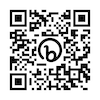

2. Github - https://github.com/amitsangani

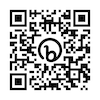
